1\)

Least Squares Cost Function: $$g(\tilde W)=\dfrac{1}{P} \sum_{p=1}^{P}(\tilde X_{p}^{T} \tilde W - y_{p})^{2}$$
1st Derivative: $$\nabla g(\tilde W)=\dfrac{2}{P} \sum_{p=1}^{P}\tilde X_{p}(\tilde X_{p}^{T} \tilde W - y_{p})$$
2nd Derivative: $$\nabla^{2} g(\tilde W)=\dfrac{2}{P} \sum_{p=1}^{P}\tilde X_{p} \tilde X_{p}^{T}$$

2\)
$$\sigma(t) = \dfrac{1}{1+e^{-t}}$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{-1}{(1+e^{-t})^2}(-e^{-t})$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{-1}{(1+e^{-t})} \dfrac{e^{-t}}{(1+e^{-t})}$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{1}{(1+e^{-t})} \dfrac{1}{(1+e^{t})}$$
$$1-\sigma(t) = 1-\dfrac{1}{1+e^{-t}} = \dfrac{(1+e^{-t})-1}{1+e^{-t}} = \dfrac{1}{1+e^{t}}$$
$$\dfrac{d\sigma(t)}{dt} = \sigma(t) (1-\sigma(t))$$

3\)

4\)

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:,0:4]
y = iris.target

import numpy as np
ones = np.ones(X.shape[0], dtype=float)
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
X_std = np.column_stack((ones, X_std))

In [8]:
def activation(Z):
    # act = np.ones(len(Z),float)
    # for i,z in enumerate(Z):
    #     act[i] = 1./(1.+np.exp(-np.clip(z,-250,250)))
    act = 1./(1.+np.exp(-np.clip(Z,-250,250)))
    return( act )

In [3]:
from sklearn.preprocessing import OneHotEncoder

def onehot(y):
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return(onehot_encoded)

y = onehot(y)

In [4]:
def argmax(Z):
    maxz = max(Z)
    for j in range(len(Z)):
        Z[j] = 1.0 if Z[j]>=maxz else 0
    return(Z)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(Y_train.shape)

(105, 5)
(105, 3)


0.11460864013942922   -2.044506566466138   0.12172551719051912
0.5785391214602709   0.3167792117528251   2.275305750347637
0.2332237908162441   -1.190196516376224   0.2655602943955719
0.841470714234256   1.6692118666766844   1.841815934494218
0.8429855076959974   1.6806116577518604   1.8514171702251137
0.9031512001460292   2.2327389834481477   4.771073859575757
0.9442418446019468   2.8293586398412622   2.8867315941736673
0.9019277075630134   2.218829485376392   2.3220503943337607
0.9577716771587673   3.1215182634536607   6.372474113617466
0.47673413651836555   -0.09313070836672338   0.6476656009027149
0.7469746022774876   1.0825413149821395   1.37426540903799
0.753115472417981   1.1152978382196894   3.0812058157827273
0.7915630177588524   1.3343727421866618   1.5681185268757707
0.8334703367184705   1.6104246613381816   1.792581827582839
0.9286836100629281   2.5666419364746376   5.355245378790568
0.3182564846976123   -0.7617958964976186   0.38310176914269256
0.6724074655647208   0.71909

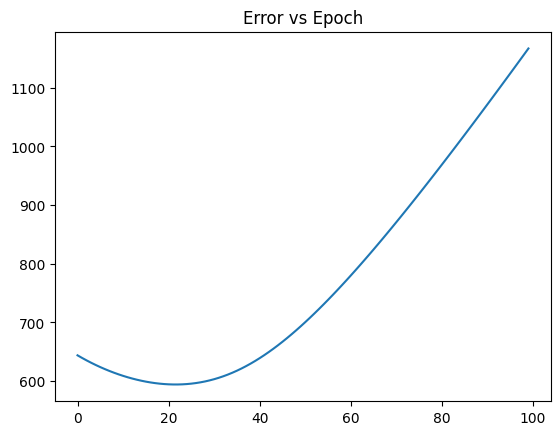

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def crossentropy_loss(W, X, Y):
    e = 1e-15 # For preventing log(0) error
    P = activation(np.dot(X.T, W))
    loss = -Y*np.log(P+e)-(1+Y)*np.log(1-P)
    print(P, ' ', np.dot(X.T, W), ' ', loss)
    return loss

def multiclass(X, Y, a, epochs=100, tol = 1e-10):
    errors = []
    total_error = 0

    W = np.random.rand(Y.shape[1], X.shape[1]) #3x5

    # abs(total_error-last_total_error)>tol
    for t in range(epochs):
        total_error = 0
        for i,x in enumerate(X):
            for j in range(Y.shape[1]):
                error = crossentropy_loss(W[j], x, Y[i,j])
                if (error >= 0):
                    dw = x * Y[i,j]
                    W[j] -= a*dw
                    total_error += error
        errors.append(total_error)
    return W, errors

W, errors = multiclass(X_train, Y_train, 5e-4)
print(W)
plt.title("Error vs Epoch")
plt.plot(range(len(errors)), errors)
plt.show()


            
        

        

    # print("Training Accuracy: ", accuracy_score(Y, Yq))
    # misclassifications = np.sum([1 if i < 0 else 0 for i in (Y*Yq)])
    # print("Misclassifications: ", misclassifications)
    # print('\n')

    # return W